# 머신 러닝 교과서 - 파이토치편

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/ml-with-pytorch/blob/main/ch09/ch09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## 패키지 버전 체크

check_packages.py 스크립트에서 로드하기 위해 폴더를 추가합니다:

In [1]:
import sys

# 코랩의 경우 깃허브 저장소로부터 python_environment_check.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
else:
    sys.path.insert(0, '..')

--2023-10-12 07:36:27--  https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1629 (1.6K) [text/plain]
Saving to: ‘python_environment_check.py’

python_environment_ 100%[===================>]   1.59K  --.-KB/s    in 0s      

2023-10-12 07:36:28 (21.1 MB/s) - ‘python_environment_check.py’ saved [1629/1629]



권장 패키지 버전을 확인하세요:

In [2]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'mlxtend': '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] Your Python version is 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
[OK] numpy 1.23.5
[OK] mlxtend 0.22.0
[OK] matplotlib 3.7.1
[OK] sklearn 1.2.2
[OK] pandas 1.5.3


# 9장 - 회귀 분석으로 연속적 타깃 변수 예측

### 목차

- 선형 회귀
  - 단순 선형 회귀
  - 다중 선형 회귀
- 에임스 주택 데이터셋 탐색
  - 데이터프레임으로 에임스 주택 데이터셋 읽기
  - 데이터셋의 중요 특징 시각
  - 상관관계 행렬을 사용한 분석
- 최소 제곱 선형 회귀 모델 구현
  - 경사 하강법으로 회귀 모델의 파라미터 구하기
  - 사이킷런으로 회귀 모델의 가중치 추정
- RANSAC을 사용하여 안정된 회귀 모델 훈련
- 선형 회귀 모델의 성능 평가
- 회귀에 규제 적용
- 선형 회귀 모델을 다항 회귀로 변환
  - 사이킷런을 사용하여 다항식 항 추가
  - 에임스 주택 데이터셋을 사용한 비선형 관계 모델링
- 랜덤 포레스트를 사용하여 비선형 관계 다루기
    - 결정 트리 회귀
    - 랜덤 포레스트 회귀
- 요약

In [3]:
from IPython.display import Image
%matplotlib inline

# 선형 회귀

## 단순 선형 회귀

In [4]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch09/figures/09_01.png', width=500)

## 다중 선형 회귀


In [5]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch09/figures/09_01_2.png', width=500)

# 에임스 주택 데이터셋 탐색

## 데이터프레임으로 에임스 주택 데이터셋 읽기

- 데이터셋 소스: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
- 데이터셋 문서: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- 데이터셋 설명: http://jse.amstat.org/v19n3/decock.pdf

- `'Overall Qual'`: 주택의 전반적인 건축 재료와 마감에 대한 등급

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

- `'Overall Cond'`: 주택의 전반적인 상태에 대한 등급

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
- `'Gr Liv Area'`: 평방 피트(square feet) 단위의 (지상) 거실 면적
- `'Central Air'`: 중앙 에어컨

       N	No
       Y	Yes

- `'Total Bsmt SF'`: 평방 피트 단위의 지하실 총 면적
- `'SalePrice'`: 판매 가격(미국 달러)

In [6]:
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [7]:
df.shape

(2930, 6)

In [8]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [9]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [10]:
# 누락된 값을 포함하고 있는 행을 삭제합니다
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

## 데이터셋의 중요 특징 시각

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

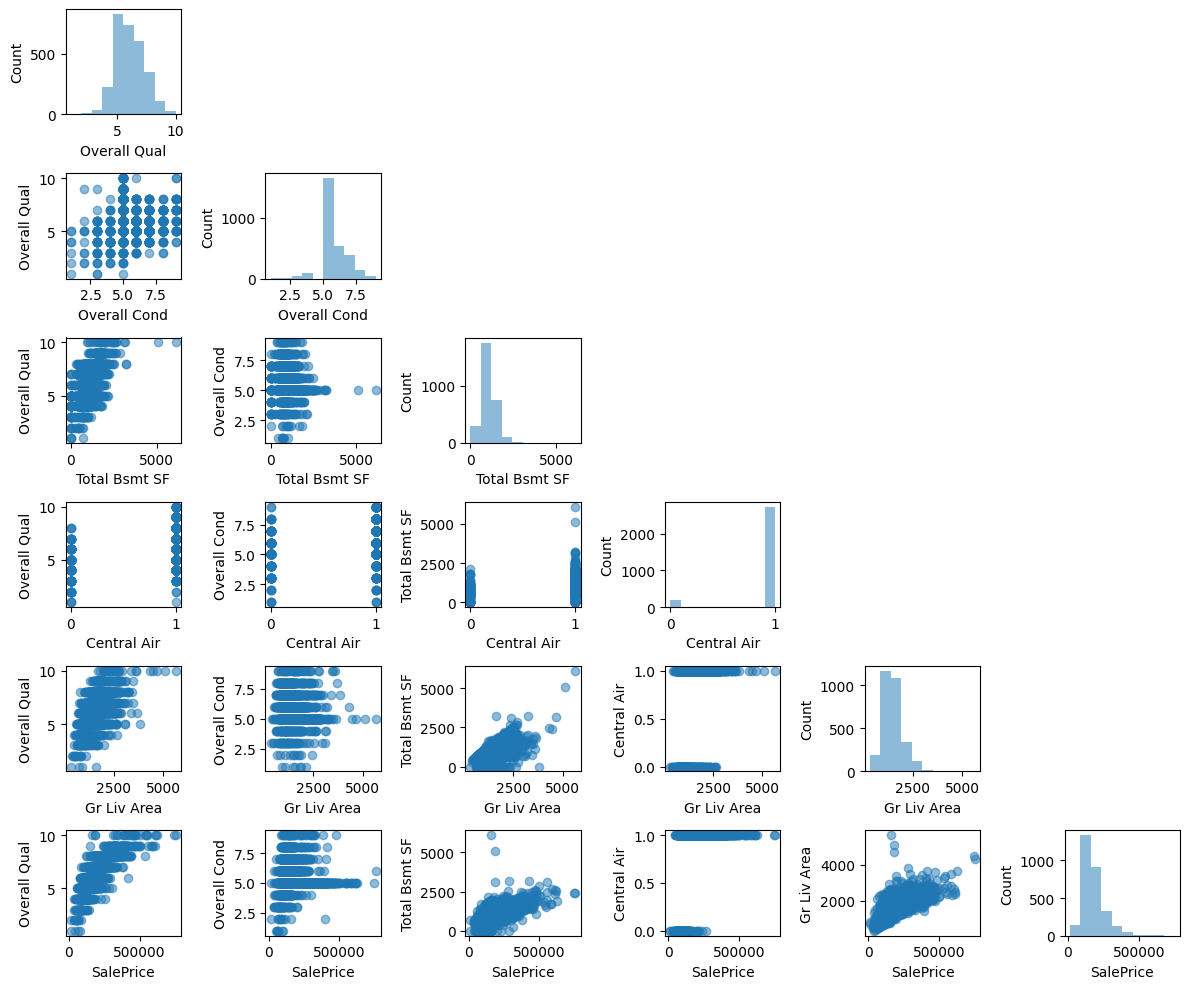

In [12]:
scatterplotmatrix(df.values, figsize=(12, 10),
                  names=df.columns, alpha=0.5)
plt.tight_layout()
#plt.savefig('figures/09_04.png', dpi=300)
plt.show()

## 상관관계 행렬을 사용한 분석

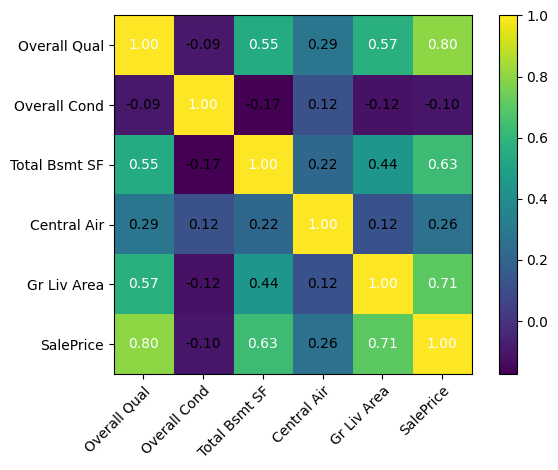

In [13]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()
#plt.savefig('figures/09_05.png', dpi=300)
plt.show()

# 최소 제곱 선형 회귀 모델 구현

## 경사 하강법으로 회귀 모델의 파라미터 구하기

In [14]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

In [15]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [16]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [17]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

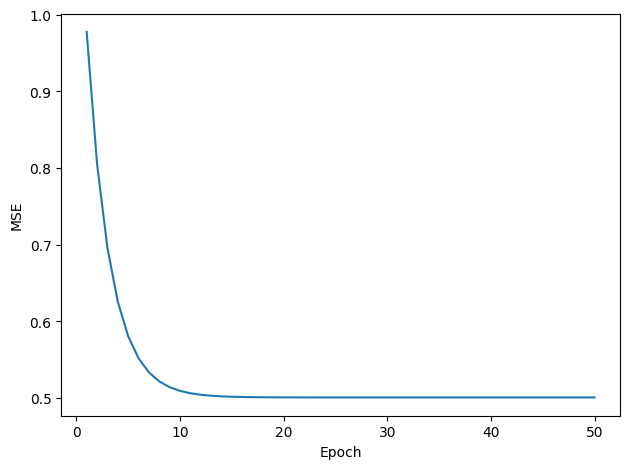

In [18]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
#plt.savefig('figures/09_06.png', dpi=300)
plt.show()

In [19]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

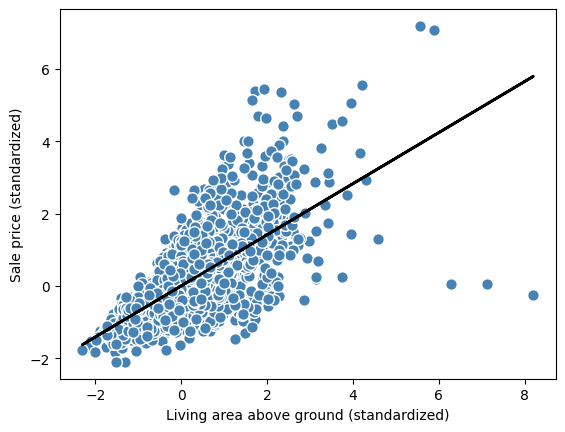

In [20]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

#plt.savefig('figures/09_07.png', dpi=300)
plt.show()

In [21]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'판매 가격: ${target_reverted.flatten()[0]:.2f}')

판매 가격: $292507.07


In [22]:
print(f'기울기: {lr.w_[0]:.3f}')
print(f'절편: {lr.b_[0]:.3f}')

기울기: 0.707
절편: -0.000


## 사이킷런으로 회귀 모델의 가중치 추정

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'기울기: {slr.coef_[0]:.3f}')
print(f'절편: {slr.intercept_:.3f}')

기울기: 111.666
절편: 13342.979


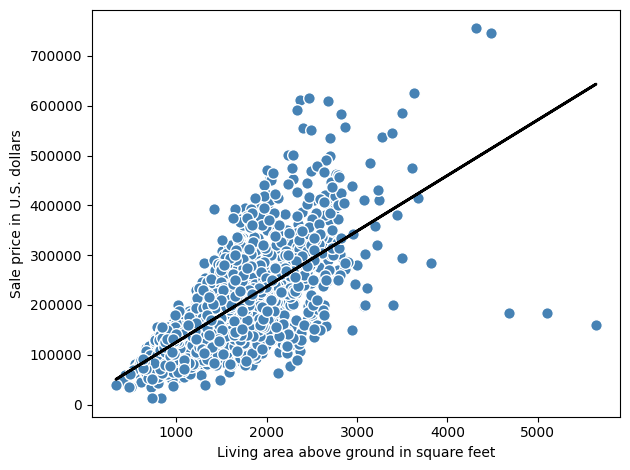

In [25]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_08.png', dpi=300)
plt.show()

**정규 방정식**:

In [26]:
# 1로 채워진 열 벡터를 추가합니다
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print(f'기울기: {w[1]:.3f}')
print(f'절편: {w[0]:.3f}')

기울기: 111.666
절편: 13342.979


# RANSAC을 사용하여 안정된 회귀 모델 훈련

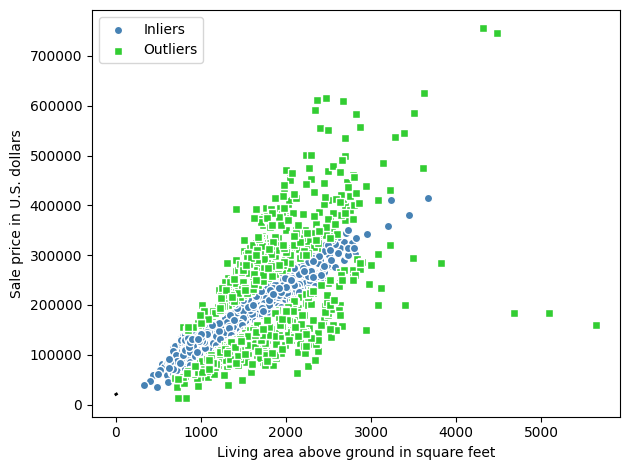

In [27]:
from sklearn.linear_model import RANSACRegressor


ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, # default
                         min_samples=0.95,
                         loss='absolute_error', # default
                         residual_threshold=None, # default
                         random_state=123)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_09.png', dpi=300)
plt.show()

In [28]:
print(f'기울기: {ransac.estimator_.coef_[0]:.3f}')
print(f'절편: {ransac.estimator_.intercept_:.3f}')

기울기: 106.348
절편: 20190.093


In [29]:
def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))

median_absolute_deviation(y)

37000.0

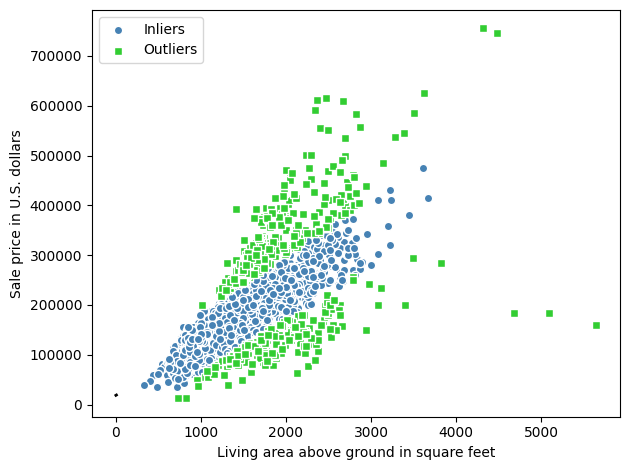

In [30]:
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, # default
                         min_samples=0.95,
                         loss='absolute_error', # default
                         residual_threshold=65000, # default
                         random_state=123)

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_10.png', dpi=300)
plt.show()

In [31]:
print(f'기울기: {ransac.estimator_.coef_[0]:.3f}')
print(f'절편: {ransac.estimator_.intercept_:.3f}')

기울기: 105.631
절편: 18314.587


# 선형 회귀 모델의 성능 평가

In [32]:
from sklearn.model_selection import train_test_split


target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [33]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

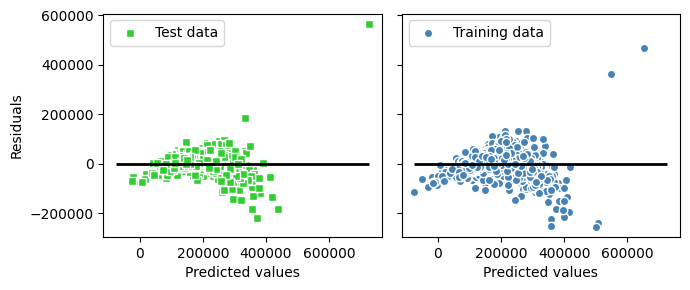

In [34]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_11.png', dpi=300)
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE 훈련: {mse_train:.2f}')
print(f'MSE 테스트: {mse_test:.2f}')

MSE 훈련: 1497216245.85
MSE 테스트: 1516565821.00


In [36]:
from sklearn.metrics import mean_absolute_error


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE 훈련: {mae_train:.2f}')
print(f'MAE 테스트: {mae_test:.2f}')

MAE 훈련: 25983.03
MAE 테스트: 24921.29


In [37]:
from sklearn.metrics import r2_score


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 훈련: {r2_train:.2f}')
print(f'R^2 테스트: {r2_test:.2f}')

R^2 훈련: 0.77
R^2 테스트: 0.75


# 회귀에 규제 적용

In [38]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[26251.38276394   804.70816337    41.94651964 11364.80761309
    55.67855548]


In [39]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE 훈련: {train_mse:.3f}, test: {test_mse:.3f}')

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 훈련: {train_r2:.3f}, {test_r2:.3f}')

MSE 훈련: 1497216262.014, test: 1516576825.348
R^2 훈련: 0.769, 0.752


리지 회귀:

In [40]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)

라쏘 회귀:

In [41]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1.0)

일라스틱 넷 회귀:

In [42]:
from sklearn.linear_model import ElasticNet


elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 선형 회귀 모델을 다항 회귀로 변환

## 사이킷런을 사용하여 다항식 항 추가

In [43]:
X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])

In [44]:
from sklearn.preprocessing import PolynomialFeatures


lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

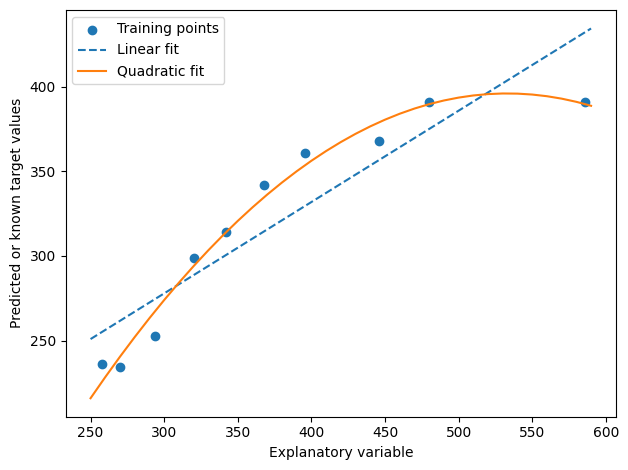

In [45]:
# 선형 특성으로 훈련합니다
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 이차 특성으로 훈련합니다
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_12.png', dpi=300)
plt.show()

In [46]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [47]:
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'훈련 MSE 선형: {mse_lin:.3f}'
      f', 다항: {mse_quad:.3f}')


r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'훈련 R^2 선형: {r2_lin:.3f}'
      f', 다항: {r2_quad:.3f}')

훈련 MSE 선형: 569.780, 다항: 61.330
훈련 R^2 선형: 0.832, 다항: 0.982


## 에임스 주택 데이터셋을 사용한 비선형 관계 모델링

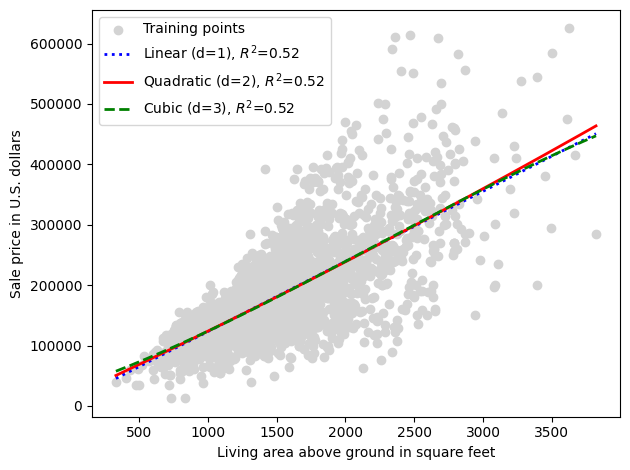

In [49]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]


regr = LinearRegression()

# 이차, 삼차 다항 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 모델을 훈련합니다
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green',
         lw=2,
         linestyle='--')


plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('figures/09_13.png', dpi=300)
plt.show()

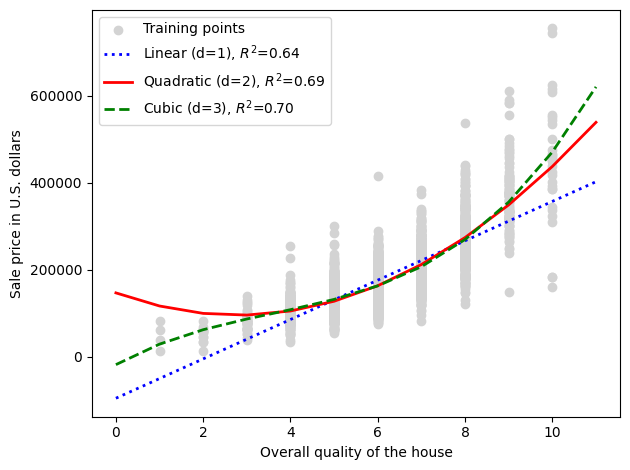

In [50]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values


regr = LinearRegression()

# 이차, 삼차 다항 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 모델을 훈련합니다
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green',
         lw=2,
         linestyle='--')


plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_14.png', dpi=300)
plt.show()

# 랜덤 포레스트를 사용하여 비선형 관계 다루기

## 결정 트리 회귀

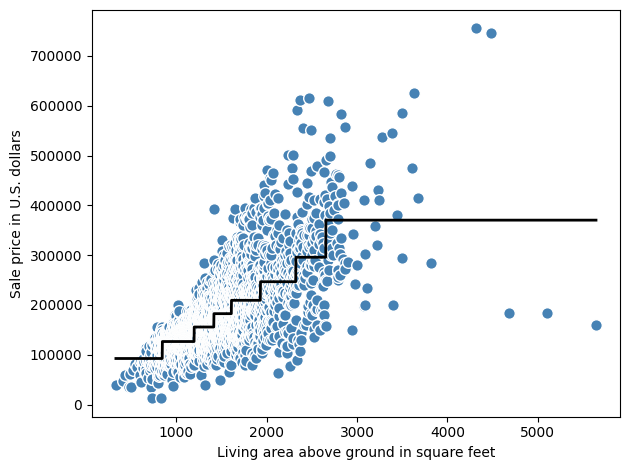

In [51]:
from sklearn.tree import DecisionTreeRegressor


X = df[['Gr Liv Area']].values
y = df['SalePrice'].values



tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_15.png', dpi=300)
plt.show()

In [52]:
tree_r2 = r2_score(y, tree.predict(X))
tree_r2

0.5144569334885711

## 랜덤 포레스트 회귀

In [53]:
target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [54]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE 훈련: {mae_train:.2f}')
print(f'MAE 테스트: {mae_test:.2f}')


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 훈련: {r2_train:.2f}')
print(f'R^2 테스트: {r2_test:.2f}')

MAE 훈련: 8305.18
MAE 테스트: 20821.77
R^2 훈련: 0.98
R^2 테스트: 0.85


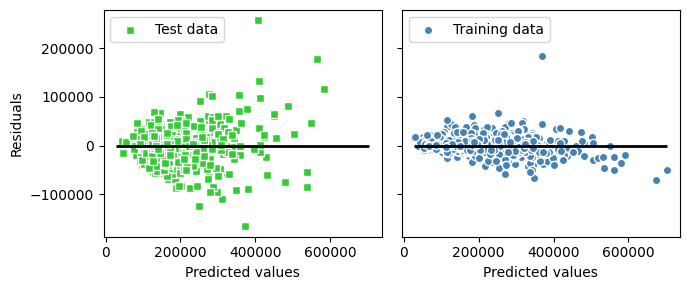

In [55]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_16.png', dpi=300)
plt.show()

# 요약